# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [38]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

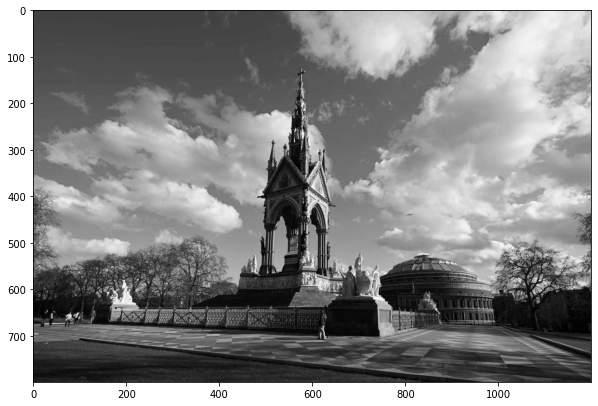

In [39]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

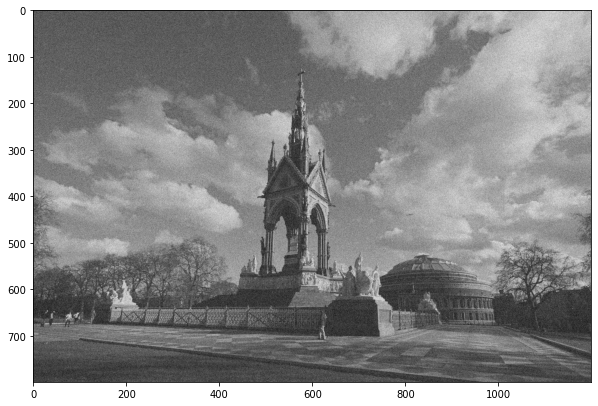

In [40]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


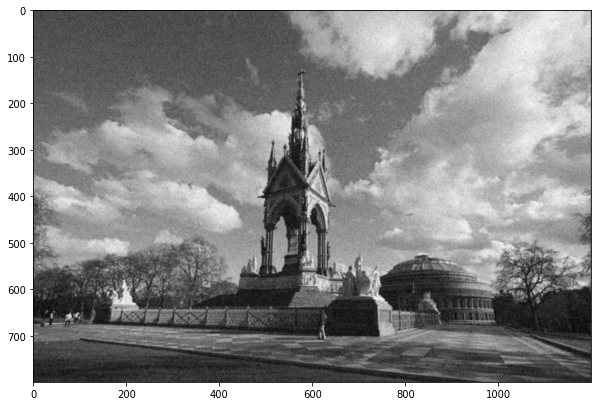

In [41]:
# Design the filter h
h = np.ones((3, 3)) / (3 * 3)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode="same")

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

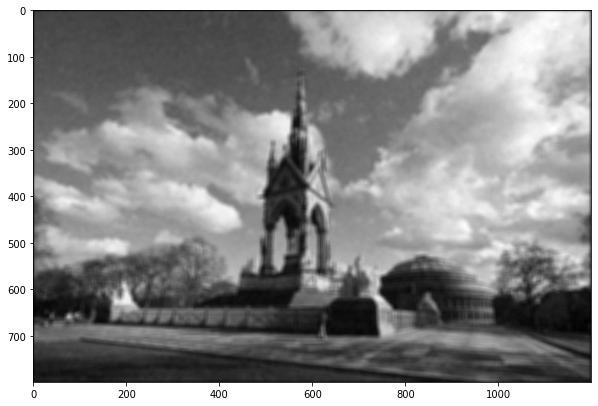

In [42]:
# Design the filter h
h = np.ones((11, 11)) / (11 * 11)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode="same")

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

Increasing the kernel size increases the blurring effect on the image. As the kernel size increases, each pixel takes more influence from its surrounding pixels when averaging the surrounding area. Therefore, a larger window size results in more pixels being averaged and therefore each pixel becomes less unique compared to its neighbours. 
However, the larger the kernel size, the less the noise appears in the image too. When the window size is smaller, the pixels affected by noise will have a larger effect on the moving average as they make up a larger portion of averaged pixels. When increasing the kernel, more pixels are averaged and therefore the noisy pixels make up a smaller percentage of the overall average, therefore decreasing their influence on the skewness of each pixel. <br>
A smaller kernel is therefore more suitabe for denoising.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


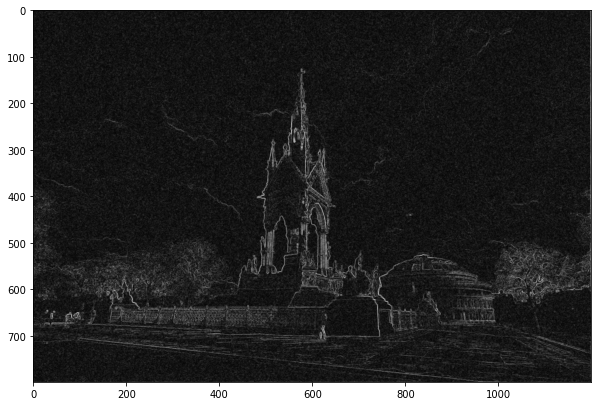

In [43]:
# Design the Prewitt filters
prewitt_x = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
prewitt_y = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

# Prewitt filtering
horizontal = scipy.signal.convolve2d(image_noisy, prewitt_x, mode="same")
vertical = scipy.signal.convolve2d(image_noisy, prewitt_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.hypot(horizontal, vertical)


# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

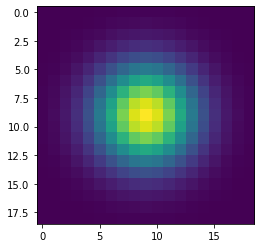

In [44]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    k = 3
    size = k * sigma
    kernel_size = (2 * size) + 1

    h = np.zeros((kernel_size, kernel_size))
    for j in range(-size, size + 1):
        for i in range(-size, size + 1):
            power = ((i * i) + (j * j)) / (-2 * sigma * sigma)
            h[i + size][j + size] = np.exp(power) / (2 * np.pi * sigma * sigma)
    
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

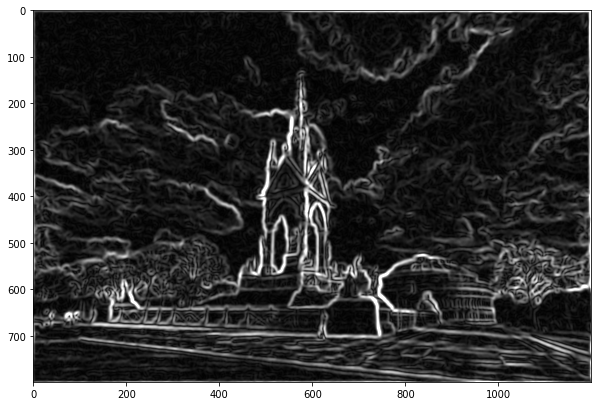

In [45]:
# Perform Gaussian smoothing before Prewitt filtering
h = gaussian_filter_2d(3)
smoothed = scipy.signal.convolve2d(image_noisy, h, mode="same")

# Prewitt filtering
horizontal = scipy.signal.convolve2d(smoothed, prewitt_x, mode="same")
vertical = scipy.signal.convolve2d(smoothed, prewitt_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.hypot(horizontal, vertical)


# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

2D Gaussian smoothing with σ=7 took 4.66 seconds


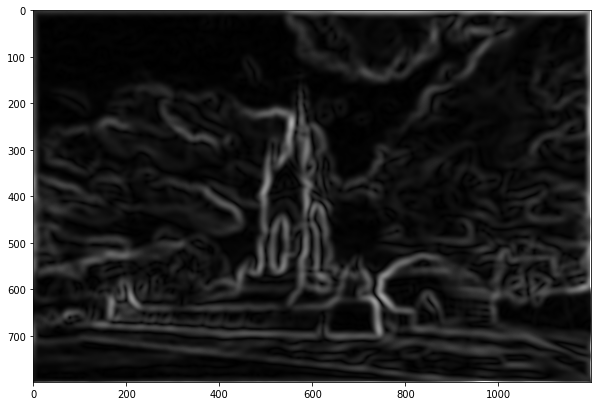

In [46]:
# Construct the Gaussian filter
h = gaussian_filter_2d(7)

# Perform Gaussian smoothing and count time
start = time.time()

smoothed = scipy.signal.convolve2d(image_noisy, h, mode="same")

seconds = time.time() - start
print(f"2D Gaussian smoothing with \u03C3=7 took {round(seconds, 2)} seconds")

# Prewitt filtering
horizontal = scipy.signal.convolve2d(smoothed, prewitt_x, mode="same")
vertical = scipy.signal.convolve2d(smoothed, prewitt_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.hypot(horizontal, vertical)


# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

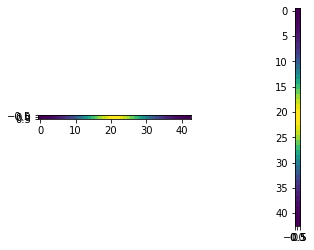

In [47]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    k = 3
    size = k * sigma
    kernel_size = (2 * size) + 1
    h = np.zeros((1, kernel_size))

    for i in range(-size, size + 1):
        power = (i * i) / (-2 * sigma * sigma)
        h[0][i + size] = np.exp(power) / (math.sqrt(2 * np.pi) * sigma)
    
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

1D Gaussian smoothing with σ=7 took 0.42 seconds
The average difference in image is 3.108051455717859e-13
The mean squared difference is 1.8230259664379128e-25
The root mean squared difference in image is 4.2696908160169077e-13


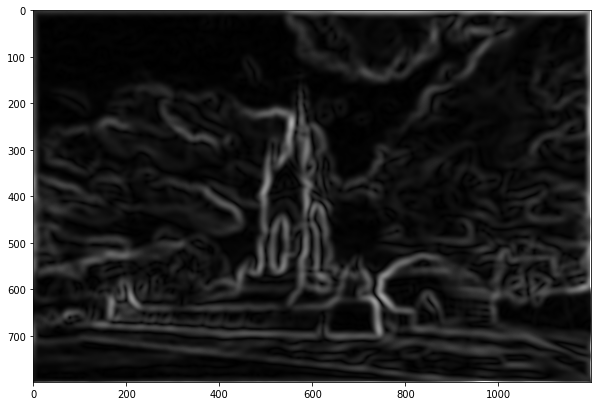

In [48]:
# Perform separable Gaussian smoothing and count time
start = time.time()

horizontal = scipy.signal.convolve2d(image_noisy, h_x, mode="same")
smoothed = scipy.signal.convolve2d(horizontal, h_y, mode="same")

seconds = time.time() - start
print(f"1D Gaussian smoothing with \u03C3=7 took {round(seconds, 2)} seconds")

# Prewitt filtering
horizontal = scipy.signal.convolve(smoothed, prewitt_x, mode="same")
vertical = scipy.signal.convolve(smoothed, prewitt_y, mode="same")

# Calculate the gradient magnitude
grad_mag2 = np.hypot(vertical, horizontal)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.

difference = grad_mag2 - grad_mag
msd = np.mean((grad_mag2 - grad_mag) ** 2)
rmsd = math.sqrt(msd)
print(f"The average difference in image is {np.mean(abs(difference))}")
print(f"The mean squared difference is {msd}")
print(f"The root mean squared difference in image is {rmsd}")

### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

When comparing the 1D and 2D method's outputs, we see that the average difference is in the magnitude of 1e-13. Therefore, we know that both outputs are essentially the same, with this marginal difference most likely being a produce of rounding errors rather than a difference arising from the methods themselves. However, when comparing the timings of the two processes, we see that the 2D approach, took up to 10 seconds on my laptop (depending on what was running in the background), whereas, the 1D approach took less than 1 second (usually ~0.5 seconds). <br>

This can be attributed to the fact that with the 1D approach, the time complexity is significantly reduced. Passing the filter over the image with a 1D Gaussian kernel takes time complexity of O(2 * N^2K) = O(N^2K) where N is the size of the image and K is the length of the 1D kernel. This is because we have to pass over both 1D kernels, hence the "2 * ..." portion, but as these run sequentially, it does not increase the complexity exponentially and so ends up with a shorter processing time. The 2D method takes O(N^2K^2) as the kernel is now 2D rather than 1D, we now traverse a 2D array for the image and the kernel, which is what slows down the processing time of the gaussian function considerably.

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [49]:
# Import libaries (provided)
import torch
import torch.nn as nn

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [50]:
# Expand the dimension of the numpy array

image = np.expand_dims(image_noisy, axis=(0, 1))

# Convert to a Pytorch tensor using torch.from_numpy
tensor_image = torch.from_numpy(image)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [51]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
weights = np.expand_dims(h, axis=(0, 1))

# Create the Conv2D filter (provided)
conv = nn.Conv2d(1, 1, weights.shape)

# Set the kernel weight
conv.weight = torch.nn.Parameter(torch.from_numpy(weights))

### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

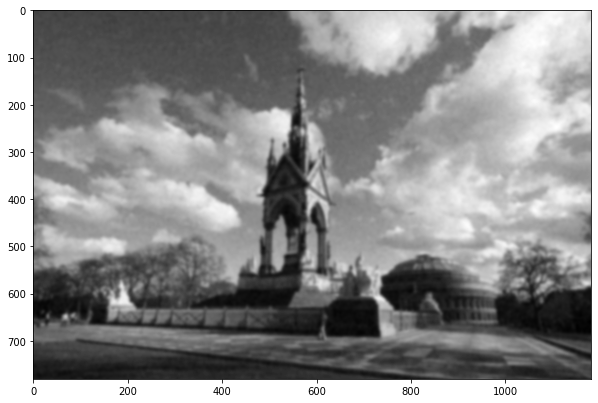

In [53]:
# Filtering
image_filtered = conv(tensor_image).detach()[0,0,:,:]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

Section 1: 1 hour <br>
Section 2: 1-2 hours <br>
Section 3: 2-3 hours